<a href="https://colab.research.google.com/github/asheta66/Data-Mining-2/blob/main/Simple_DT_Proning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.facecolor"] = "white"  # Set background color
plt.rcParams["axes.facecolor"] = "yellow"  # Change node background
plt.rcParams["text.color"] = "darkblue"  # Change text color

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree without any pruning (full tree)
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Predict on the test set
y_pred_full = clf_full.predict(X_test)

# Accuracy of the full tree
print("Accuracy of Full Tree:", accuracy_score(y_test, y_pred_full))

Accuracy of Full Tree: 1.0


In [28]:
# Accuracy of the full tree
print("Accuracy of Full Tree:", accuracy_score(y_test, y_pred_full))
print(f"Number of nodes in the Original Tree (before pruning): {clf_full.tree_.node_count}")

Accuracy of Full Tree: 1.0
Number of nodes in the Original Tree (before pruning): 19


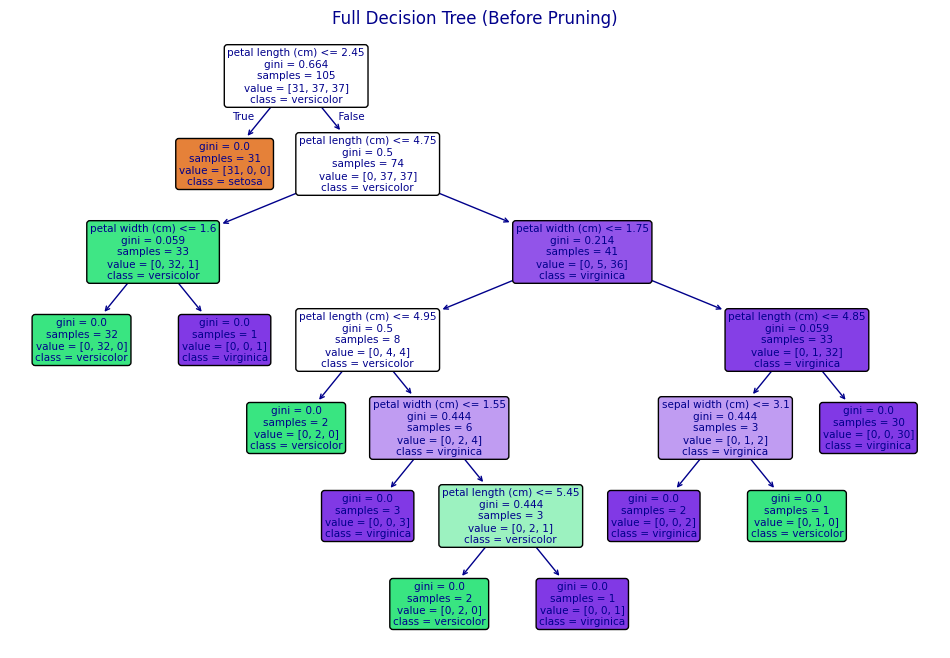

In [29]:
# Plot the full (unpruned) decision tree
plt.figure(figsize=(12,8))
plot_tree(clf_full, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.title("Full Decision Tree (Before Pruning)")
plt.show()

In [30]:
# Post-pruning using Cost-Complexity Pruning (CCP)
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Manually set the alpha value for pruning
best_alpha = 0.01  # Set a specific value of alpha for pruning

# Train the decision tree with the selected alpha value
best_pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
best_pruned_tree.fit(X_train, y_train)

# Predict on the test set for the pruned tree
y_pred_pruned = best_pruned_tree.predict(X_test)

# Accuracy of the pruned tree
print("Accuracy of Pruned Tree:", accuracy_score(y_test, y_pred_pruned))

Accuracy of Pruned Tree: 1.0


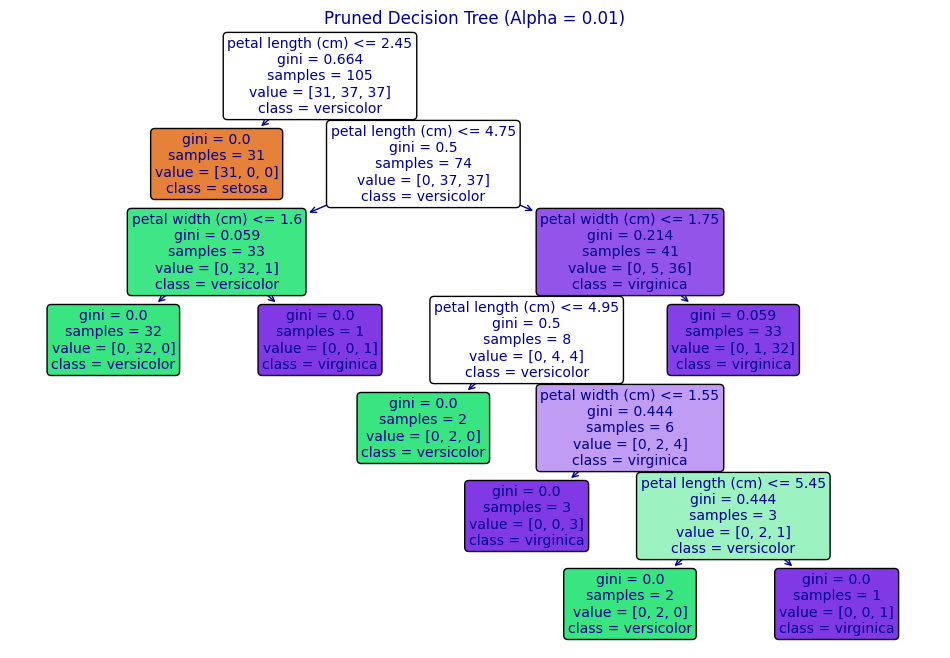

Number of nodes in Pruned Tree (after pruning): 15


In [31]:
# Plot the pruned decision tree
plt.figure(figsize=(12,8))
plot_tree(best_pruned_tree, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.title(f"Pruned Decision Tree (Alpha = {best_alpha})")
plt.show()

# Print number of nodes after pruning
print(f"Number of nodes in Pruned Tree (after pruning): {best_pruned_tree.tree_.node_count}")